# TP Least squares

Authors: Anastasiia Karpova; William Liaw.

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import data and helper functions

In [2]:
from data_center_helper import *

## Preliminary data analysis

In [3]:
data = data.iloc[:, 1:]
data["TIME"] = pd.to_datetime(data["TIME"], format="mixed")

In [4]:
data.head()

,TIME,VALUE,BUILDING,DETAILS,NAME,SUBCATEGORY,LIBELLE,UNITE
0,2022-05-01 19:24:38.178000+00:00,348307.0,bat01,auxiliary_inverter_1_ge,bat01.r01.b.cfo.tgtbqb.dis124.cpt.ea.mes,active_energy_auxiliary_ge,Energie active,kWh
1,2022-05-02 16:04:38.148000+00:00,348497.0,bat01,auxiliary_inverter_1_ge,bat01.r01.b.cfo.tgtbqb.dis124.cpt.ea.mes,active_energy_auxiliary_ge,Energie active,kWh
2,2022-05-30 05:24:37.188000+00:00,353967.0,bat01,auxiliary_inverter_1_ge,bat01.r01.b.cfo.tgtbqb.dis124.cpt.ea.mes,active_energy_auxiliary_ge,Energie active,kWh
3,2022-05-03 06:32:38.127000+00:00,15.5,bat01,auxiliary_inverter_1_ge,bat01.r01.b.cfo.tgtbqb.dis124.cpt.pa.mes,active_power_auxiliary_ge,Puissance active,kW
4,2022-05-04 11:28:38.085000+00:00,2.6,bat01,auxiliary_inverter_1_ge,bat01.r01.b.cfo.tgtbqb.dis124.cpt.pa.mes,active_power_auxiliary_ge,Puissance active,kW


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456700 entries, 0 to 456699
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   TIME         456700 non-null  datetime64[ns, UTC]
 1   VALUE        456700 non-null  float64            
 2   BUILDING     456700 non-null  object             
 3   DETAILS      456700 non-null  object             
 4   NAME         456700 non-null  object             
 5   SUBCATEGORY  456700 non-null  object             
 6   LIBELLE      456700 non-null  object             
 7   UNITE        430055 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(6)
memory usage: 27.9+ MB


In [6]:
data.describe(include='all')

,TIME,VALUE,BUILDING,DETAILS,NAME,SUBCATEGORY,LIBELLE,UNITE
count,456700,4.567000e+05,456700,456700,456700,456700,456700,430055
unique,NaN,NaN,1,125,1794,455,126,13
top,NaN,NaN,bat01,rt_16_b1_3,bat01.r01.b.cvc.rt_10b15.gf.fct.mes,temperature_it_room_b1,température,%
freq,NaN,NaN,456700,32240,1087,8312,19106,116749
mean,2022-05-16 19:26:29.192930048+00:00,1.066365e+04,NaN,NaN,NaN,NaN,NaN,NaN
min,2022-04-30 22:44:38.208000+00:00,-3.270629e+03,NaN,NaN,NaN,NaN,NaN,NaN
25%,2022-05-07 05:36:37.988999936+00:00,2.195044e+01,NaN,NaN,NaN,NaN,NaN,NaN
50%,2022-05-17 15:40:37.625999872+00:00,5.029004e+01,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022-05-25 15:52:37.347000064+00:00,1.505638e+03,NaN,NaN,NaN,NaN,NaN,NaN
max,2022-05-31 21:59:59+00:00,1.133439e+06,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(
    f"""
    Number of features:\t{len(names)},
    Train data shape:\t{data_matrix_train.shape},
    Test data shape:\t{data_matrix_test.shape},
    Train KPI shape:\t{COP_train.shape},
    Test KPI shape:\t{COP_test.shape}
    """
)


    Number of features:	892,
    Train data shape:	(722, 892),
    Test data shape:	(361, 892),
    Train KPI shape:	(722, 4),
    Test KPI shape:	(361, 4)
    


In [8]:
print(f"""
A's (x, 1, -y*x) train shape: {A.shape},
b's (KPI number 3) traint shape: {b.shape}
A's (x, 1, -y*x) test shape: {A_test.shape},
b's (KPI number 3) test shape: {b_test.shape}
""")


A's (x, 1, -y*x) train shape: (722, 1785),
b's (KPI number 3) traint shape: (722,)
A's (x, 1, -y*x) test shape: (361, 1785),
b's (KPI number 3) test shape: (361,)



## 3. Least squares

### Question 3.1.

By focusing on the key performance indicator (KPI) number 3, and simplifying $(w_{i=3,0}, w_{i=3,1}, w_{i=3,2})$ as $(w_0, w_1, w_2)$, we consider the model:

$$
y(t) = \frac{w_1^T\tilde{x}(t) + w_0 + \epsilon(t)}{w_2^T\tilde{x}(t) + 1}
$$

Where we aim to solve the least square problem:

$$
\min\limits_w\frac{1}{2}\|Aw - b\|^2
$$,

where:

\begin{align*}
(Aw)_t &= \tilde{x}(t)^Tw_1 + w_0 - y(t)\times \tilde{x}(t)^Tw_2\\
b_t &= y(t)
\end{align*}

In this context, $\hat{w} = (A^T A)^{-1}A^T b$.

If $Aw=b$:

\begin{align*}
\tilde{x}(t)^Tw_1 + w_0 - y(t)\times\tilde{x}(t)^Tw_2 &= y(t) \\
\tilde{x}(t)^Tw_1+w_0 &= y(t)\times\tilde{x}(t)^Tw_2 + y(t) \\
\frac{\tilde{x}(t)^Tw_1+w_0}{\tilde{x}(t)^Tw_2 + 1} &= y(t) \\
\Rightarrow y(t) &= \frac{w_1^T\tilde{x}(t) + w_0}{w_2^T\tilde{x}(t) + 1}
\end{align*}

Thus, $Aw=b \iff y(t)=\frac{w_1^T\tilde{x}(t)+w_0}{w_2^T\tilde{x}(t)+1}$

### Question 3.2.

In [9]:
w_lstsq = np.linalg.lstsq(A, b, rcond=None)[0]

### Question 3.3.

To evaluate the found solution on the test sample, we can proceed by calculating $\frac{1}{2}||Aw - b||^2$, on the training sample and on the test sample:

In [10]:
print(f"""
Training sample: {(1/2)*np.linalg.norm(b - A @ w_lstsq)**2},
Test sample: {(1/2)*np.linalg.norm(b_test - A_test @ w_lstsq)**2}
""")


Training sample: 4.237266019148281e-25,
Test sample: 140952.175523103



Despite the promising outcome observed on the training sample, with the minimized function yielding a value close to 0, the determined weights exhibit subpar performance on the test sample. This discrepancy is apparent in the considerably large value produced by the minimized function, serving as a clear indicator of an overfitted model.

### Question 3.4.

In [11]:
lambd = 100

In [12]:
w_l2_regularization = np.linalg.lstsq(
    A.T @ A + lambd * np.identity(A.shape[1]), A.T @ b, rcond=None
)[0]

To evaluate the found solution on the test sample, we can proceed by calculating $\frac{1}{2}\|Aw - b\|^2 + \frac{\lambda}{2}\|w\|^2$, on the training sample and on the test sample:

In [13]:
print(f"""
Training sample: {(1/2)*np.linalg.norm(b - A @ w_l2_regularization)**2 + (lambd/2)*np.linalg.norm(w_l2_regularization)**2},
Test sample: {(1/2)*np.linalg.norm(b_test - A_test @ w_l2_regularization)**2 + (lambd/2)*np.linalg.norm(w_l2_regularization)**2}
""")


Training sample: 301.51532425463233,
Test sample: 54565.04853323527



Once again, despite the promising outcome observed on the training sample, the determined weights demonstrate subpar performance on the test sample. This discrepancy is evident in the considerably large value produced by the minimized function, serving as a clear indicator of an overfitted model. It is important to note, however, that this $\ell_2$ regularized model is significantly less overfitted than the previous Least Squares model, as its performance on the test sample is not as abysmal. As evidence of this, in the next cell, we compute $\|Aw - b\|$ for both models:

In [14]:
print(f"""
Train sample:
LSTSQ: {np.linalg.norm(b - A @ w_lstsq)},
L2 regularization: {np.linalg.norm(b - A @ w_l2_regularization)}

Test sample
LSTSQ: {np.linalg.norm(b_test - A_test @ w_lstsq)},
L2 regularization: {np.linalg.norm(b_test - A_test @ w_l2_regularization)}
""")


Train sample:
LSTSQ: 9.205722154343223e-13,
L2 regularization: 12.398650226890355

Test sample
LSTSQ: 530.9466555560982,
L2 regularization: 329.66770079188836



### Question 3.5.

The gradient of the function $f_1 : w \mapsto \frac{1}{2}\|Aw − b\|^2 + \frac{\lambda}{2}\|w\|^2$ is obtained by computing the partial derivatives with respect to $ w $:

\begin{align*}
\nabla f_1(w) &= \frac{\partial}{\partial w}(\frac{1}{2} \|Aw - b\|^2) + \frac{\partial}{\partial w}(\frac{\lambda}{2} \|w\|^2) \\
&= \frac{1}{2}\frac{\partial}{\partial w} \|Aw - b\|^2 + \frac{\lambda}{2}\frac{\partial}{\partial w}\|w\|^2 \\
&= \frac{1}{2}\frac{\partial}{\partial w} ((Aw - b)^T\cdot(Aw - b)) + \frac{\lambda}{2}\frac{\partial}{\partial w} (w^Tw) \\
\end{align*}

Focusing on the term $\frac{\partial}{\partial w} \big((Aw - b)^T\cdot(Aw - b)\big)$:

\begin{align*}
\frac{\partial}{\partial w} \big((Aw - b)^T\cdot(Aw - b)\big) &= \frac{\partial}{\partial w} \big(w^TA^TAw - w^TA^Tb - b^TAw + b^Tb\big) \\
&= A^TAw + w^TA^TA - A^Tb - A^Tb + 0 \\
&= 2A^T(Aw - b)
\end{align*}

Substituting this result back in the original expression, we get:

\begin{align*}
\nabla f_1(w) &= \frac{1}{2}\cdot 2A^T(Aw - b) + \frac{\lambda}{2}\cdot 2Iw \\
&= A^T (Aw - b) + \lambda Iw \\
\Rightarrow \nabla f_1(w) &= (A^T A + \lambda I)w - A^T b 
\end{align*}

The Hessian matrix of $ f_1(w) $ is given by $ H = A^T A + \lambda I $, where $ I $ is the identity matrix. To verify the convexity of $ f_1(w) $, we examine the terms involved:

1. $ A^T A $ is positive semi-definite since $ A^T A = \|A\|^2 \geq 0 $ for any matrix $ A $. The $L_2$ norm of a matrix $A$, denoted as $\|A\|_2$, is equal to zero if and only if every element $a_{ij}$ of the matrix $A$ is zero, expressed as $\|A\|^2 = 0 \iff a_{ij} = 0$ for all $i$ and $j$. As $A$ is specified not to be the zero matrix, it implies that there exist non-zero entries in $A$. Consequently, the product $A^T A$ is positive definite.
2. $ \lambda I $, where $ \lambda > 0 $, is positive definite as it scales the identity matrix.

The sum of positive definite matrices is positive definite. Therefore, $ H = A^T A + \lambda I $ is positive definite, and by the second-order condition for convexity, $ f_1(w) $ is convex.

### Question 3.6.

In [15]:
def gradient_descent(
    max_iterations,
    step_size,
    w_init,
    obj_func,
    grad_func,
    threshold=1,
    verbose=False,
):
    w = w_init
    w_history = w
    f_history = obj_func(w)

    for iteration in range(max_iterations):
        w -= step_size * grad_func(w)

        if iteration % 10000 == 0 and verbose:
            w_history = np.vstack((w_history, w))
            f_history = np.vstack((f_history, obj_func(w)))
            print(f"Step: {iteration}, Norm of grad: {np.linalg.norm(grad_func(w))}")

        if np.linalg.norm(grad_func(w)) <= threshold and verbose:
            print(f"Number of iterations: {iteration}")
            print(f"Norm of grad: {np.linalg.norm(grad_func(w))}")
            break

    if verbose:
        return w, w_history, f_history

    return w

By utilizing Proposition 1.4.1 from the course's handout, we can apply its insights to calculate the value of $L$, consequently establishing an upper limit for the step size, denoted as $\frac{2}{L}$.

Referring to information from Question 3.5, where $H = A^T A + \lambda I \Rightarrow \|H\| = \|A^T A\| + \lambda = L$, we recognize that if we choose $\gamma < \frac{2}{L}$, the gradient descent algorithm will converge to $x^*$ such that $\|\nabla f_1(x^*)\| = 0$.

In [16]:
L = np.linalg.norm(A.T @ A) + lambd

2/L

4.7034672060866193e-07

In [17]:
f1 = (
    lambda w, A, b, lambd: (1 / 2) * np.linalg.norm(A @ w - b) ** 2
    + (lambd / 2) * np.linalg.norm(w) ** 2
)

t1 = A.T @ A + lambd * np.identity(A.shape[1])
t2 = A.T @ b
f1_gradient_train = lambda w: t1 @ w - t2

step_size = 1.9/L

w_gradient_descent, w_gradient_descent_history, f_history_train = gradient_descent(
    max_iterations=100000,
    step_size=step_size,
    w_init=np.zeros(A.shape[1]),
    obj_func=lambda w: f1(w, A, b, lambd),
    grad_func=f1_gradient_train,
    verbose=True,
)

Step: 0, Norm of grad: 62015.478885047545
Step: 10000, Norm of grad: 111.41470490888052
Step: 20000, Norm of grad: 31.804547649277545
Step: 30000, Norm of grad: 11.861728117279583
Step: 40000, Norm of grad: 5.0911285958091455
Step: 50000, Norm of grad: 2.384909948503544
Step: 60000, Norm of grad: 1.1835979888228894
Number of iterations: 62503
Norm of grad: 0.9999737158935562


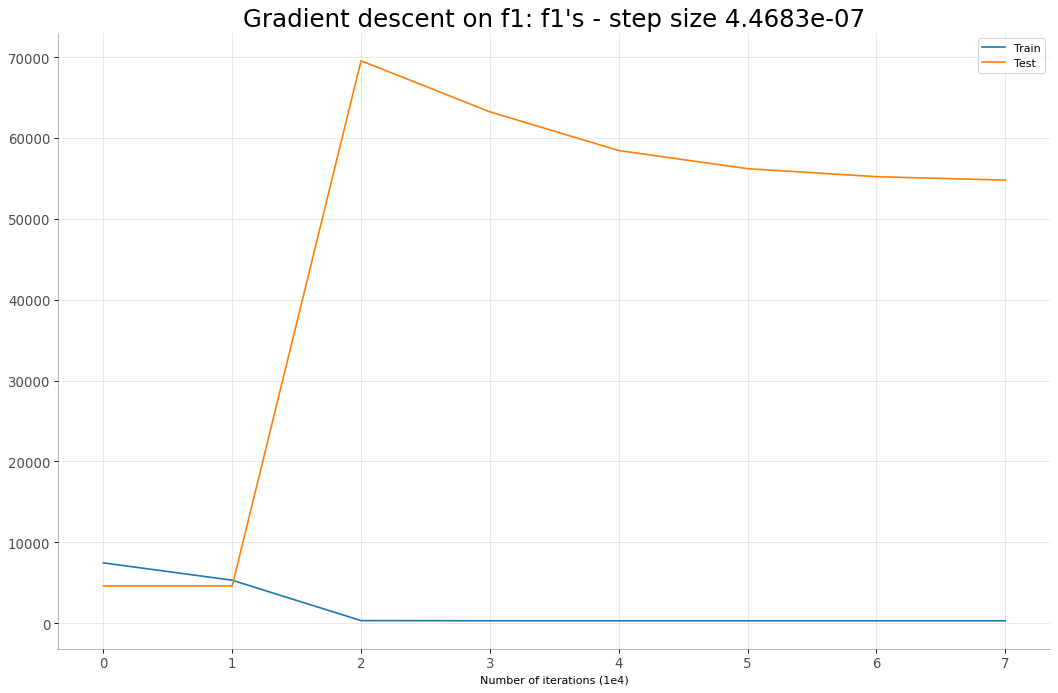

In [18]:
f_history_test = [f1(w, A_test, b_test, lambd) for w in w_gradient_descent_history]

plt.figure(figsize=(16, 10), dpi=80)

plt.plot(range(len(f_history_train)), f_history_train, label="Train")
plt.plot(range(len(f_history_test)), f_history_test, label="Test")

plt.xticks(rotation=0, fontsize=12, horizontalalignment="center", alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.title(f"Gradient descent on f1: f1's - step size {step_size:.5g}", fontsize=22)
plt.xlabel("Number of iterations (1e4)")
plt.grid(axis="both", alpha=0.3)
plt.legend()

plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

In [19]:
t1_test = A_test.T @ A_test + lambd * np.identity(A_test.shape[1])
t2_test = A_test.T @ b_test
f1_gradient_test = lambda w: t1_test @ w - t2_test

gradient_history_train = np.vstack(
    [np.linalg.norm(f1_gradient_train(w)) for w in w_gradient_descent_history]
)
gradient_history_test = np.vstack(
    [np.linalg.norm(f1_gradient_test(w)) for w in w_gradient_descent_history]
)

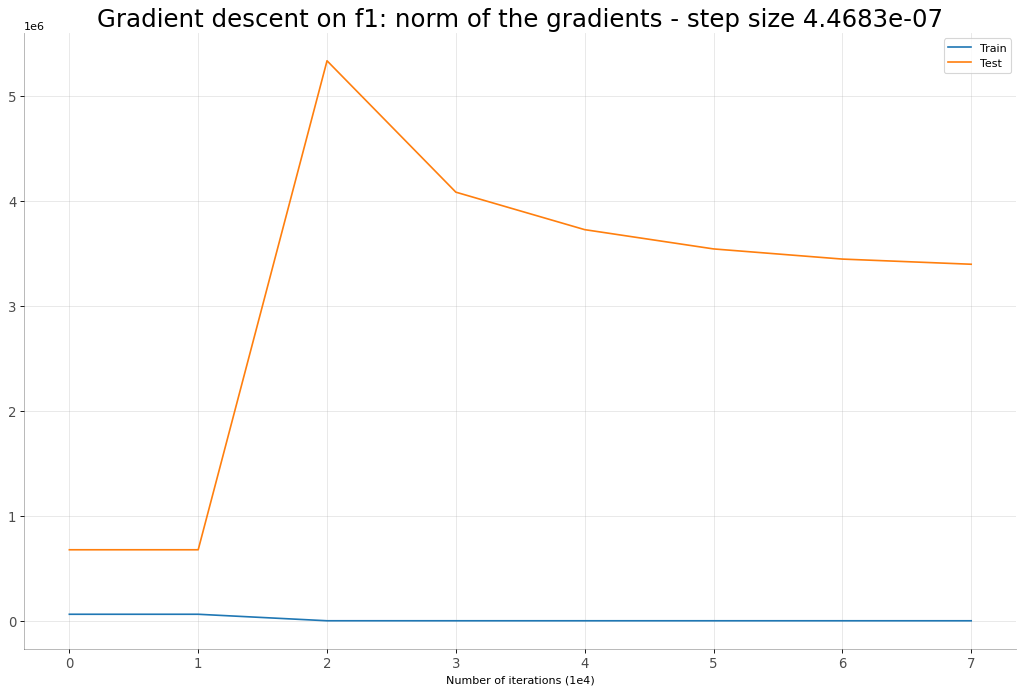

In [20]:
plt.figure(figsize=(16, 10), dpi=80)

plt.plot(range(len(gradient_history_train)), gradient_history_train, label="Train")
plt.plot(range(len(gradient_history_test)), gradient_history_test, label="Test")

plt.xticks(rotation=0, fontsize=12, horizontalalignment="center", alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.title(f"Gradient descent on f1: norm of the gradients - step size {step_size:.5g}", fontsize=22)
plt.xlabel("Number of iterations (1e4)")
plt.grid(axis="both", alpha=0.3)
plt.legend()

plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

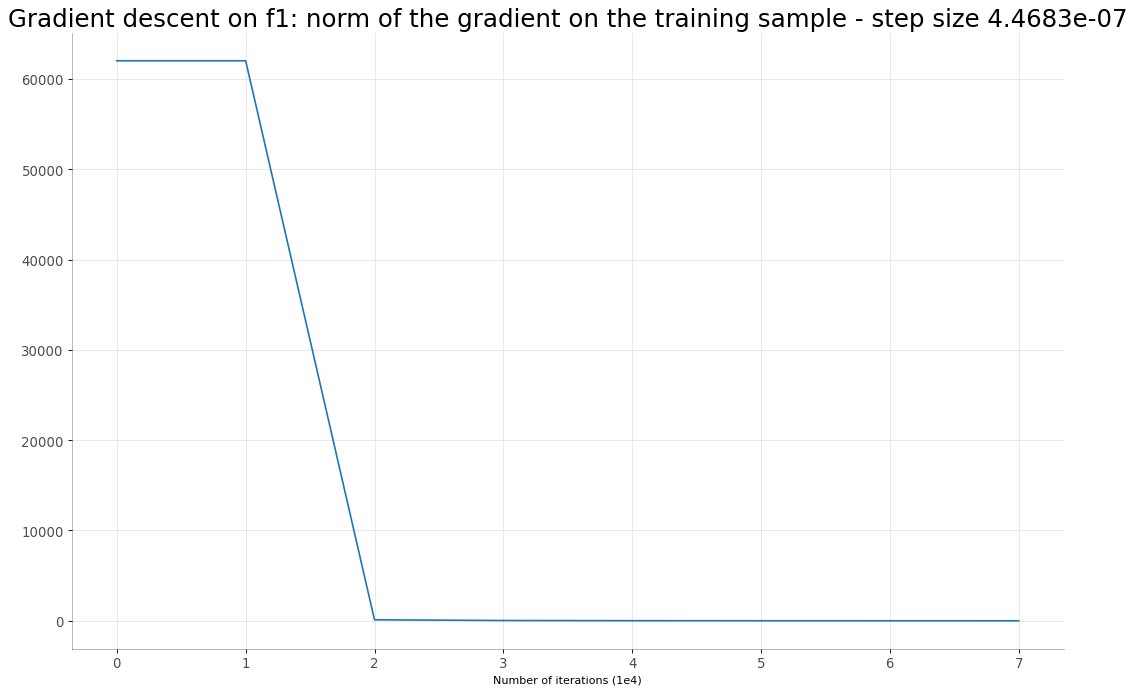

In [21]:
plt.figure(figsize=(16, 10), dpi=80)

plt.plot(range(len(gradient_history_train)), gradient_history_train, label="Train")

plt.xticks(rotation=0, fontsize=12, horizontalalignment="center", alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.title(f"Gradient descent on f1: norm of the gradient on the training sample - step size {step_size:.5g}", fontsize=22)
plt.xlabel("Number of iterations (1e4)")
plt.grid(axis="both", alpha=0.3)

plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

From the graphs above, we can observe that the gradient descent algorithm is a method of slow convergence.

In [22]:
print(f"""
Training sample: {f1(w_gradient_descent, A, b, lambd)},
Test sample: {f1(w_gradient_descent, A_test, b_test, lambd)}
""")


Training sample: 301.5187865344042,
Test sample: 54737.17259875137



In [23]:
print(f"""
Train sample:
LSTSQ: {np.linalg.norm(b - A @ w_lstsq)},
L2 regularization: {np.linalg.norm(b - A @ w_l2_regularization)}
Gradient Descent: {np.linalg.norm(b - A @ w_gradient_descent)}

Test sample
LSTSQ: {np.linalg.norm(b_test - A_test @ w_lstsq)},
L2 regularization: {np.linalg.norm(b_test - A_test @ w_l2_regularization)}
Gradient Descent: {np.linalg.norm(b_test - A_test @ w_gradient_descent)}
""")


Train sample:
LSTSQ: 9.205722154343223e-13,
L2 regularization: 12.398650226890355
Gradient Descent: 12.427240132697595

Test sample
LSTSQ: 530.9466555560982,
L2 regularization: 329.66770079188836
Gradient Descent: 330.1904661278845



Nevertheless, in terms of results, we can see that the gradient descent algorithm has a similar performance as the $\ell_2$ regularized model. In terms of computational complexity and time ressources, the gradient descent algorithm is subpar if compared to the other models.

## 4. Regularization for a sparse model

### Question 4.1.

The proximal operator of a convex lower-semicontinuous function $g_2$ is defined as: $\text{prox}_{g_2}(v) = \arg \min_w \left( g(w) + \frac{1}{2} \| w - v \|^2 \right)$. Additionally, the proximal operator of the 1-norm is the element-wise soft-thresholding operator: $S_{\lambda}(x) = \text{sign}(x) \cdot \max(|x| - \lambda, 0)$.

The objective function is given by: $F_2(w) = \frac{1}{2} \| Aw - b \|_2^2 + \lambda \| w \|_1$. From there, we can identify $f_2$ and $g_2$:
- $f_2(w) = \frac{1}{2} \| Aw - b \|^2$;
- $g_2(w) = \lambda \| w \|_1$. Thus: $\text{prox}_{g_2}(v)_i = \text{sign}(v_i) \cdot \max(|v_i| - \lambda, 0)$.

Now, let's calculate the gradient of $f_2$:

\begin{align*}
\nabla f_2(w) &= \frac{\partial}{\partial w}(\frac{1}{2} \|Aw - b\|^2) \\
&= \frac{1}{2}\frac{\partial}{\partial w} \|Aw - b\|^2 \\
&= \frac{1}{2}\frac{\partial}{\partial w} ((Aw - b)^T\cdot(Aw - b)) \\
&= \frac{1}{2}\cdot 2A^T(Aw - b) \\
\Rightarrow \nabla f_2(w) &= A^T (Aw - b)
\end{align*}

### Question 4.2.

In [24]:
def soft_thresholding(x, threshold):
    return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

def proximal_gradient_descent(
    max_iterations,
    step_size,
    w_init,
    lambd,
    obj_func,
    grad_func,
    threshold=1,
    verbose=False,
):
    w = w_init
    w_history = w
    f_history = obj_func(w)

    for iteration in range(max_iterations):
        w = soft_thresholding(w - step_size * grad_func(w), lambd*step_size)

        if iteration % 10000 == 0 and verbose:
            w_history = np.vstack((w_history, w))
            f_history = np.vstack((f_history, obj_func(w)))
            print(f"Step: {iteration}, Norm of grad: {np.linalg.norm(grad_func(w))}")

        if np.linalg.norm(grad_func(w)) <= threshold and verbose:
            print(f"Number of iterations: {iteration}")
            print(f"Norm of grad: {np.linalg.norm(grad_func(w))}")
            break

    if verbose:
        return w, w_history, f_history

    return w

In [25]:
L = np.linalg.norm(A.T @ A)

2/L

4.7035778217067977e-07

In [26]:
f2 = lambda w, A, b: (1 / 2) * np.linalg.norm(A @ w - b) ** 2

t1 = A.T @ A
t2 = A.T @ b
f2_gradient_train = lambda w: t1 @ w - t2

step_size = 1.9/L

w_proximal_gradient_descent, w_proximal_gradient_descent_history, f_history_train = proximal_gradient_descent(
    max_iterations=100000,
    step_size=step_size,
    lambd=200,
    w_init=np.zeros(A.shape[1]),
    obj_func=lambda w: f2(w, A, b),
    grad_func=f2_gradient_train,
    verbose=True
)

Step: 0, Norm of grad: 55331.84301502639
Step: 10000, Norm of grad: 2701.562236512747
Step: 20000, Norm of grad: 2529.0167347005845
Step: 30000, Norm of grad: 2521.379567226735
Step: 40000, Norm of grad: 2521.0137470842424
Step: 50000, Norm of grad: 2520.9946775190647
Step: 60000, Norm of grad: 2520.9936819598274
Step: 70000, Norm of grad: 2520.993629982604
Step: 80000, Norm of grad: 2520.993627268924
Step: 90000, Norm of grad: 2520.993627127221


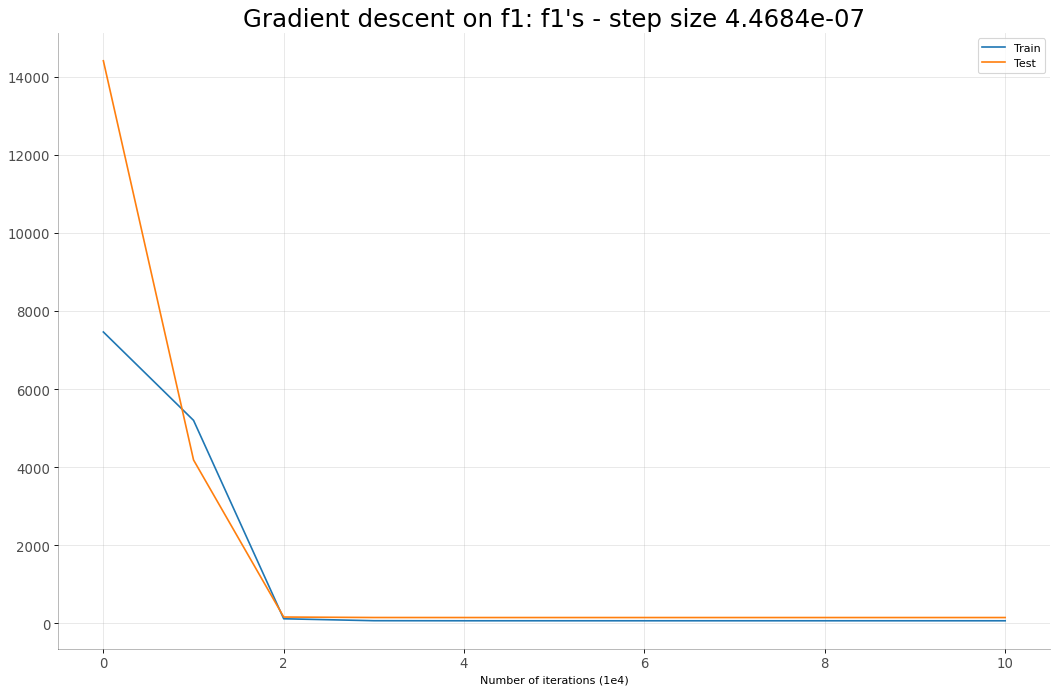

In [27]:
f_history_test = np.vstack(
    [f2(w, A_test, b_test) for w in w_proximal_gradient_descent_history]
)

plt.figure(figsize=(16, 10), dpi=80)

plt.plot(range(len(f_history_train)), f_history_train, label="Train")
plt.plot(range(len(f_history_test)), f_history_test, label="Test")

plt.xticks(rotation=0, fontsize=12, horizontalalignment="center", alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.title(f"Gradient descent on f1: f1's - step size {step_size:.5g}", fontsize=22)
plt.xlabel("Number of iterations (1e4)")
plt.grid(axis="both", alpha=0.3)
plt.legend()

plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

In [28]:
t1_test = A_test.T @ A_test
t2_test = A_test.T @ b_test
f2_gradient_test = lambda w: t1_test @ w - t2_test

gradient_history_train = np.vstack(
    [np.linalg.norm(f2_gradient_train(w)) for w in w_proximal_gradient_descent_history]
)
gradient_history_test = np.vstack(
    [np.linalg.norm(f2_gradient_test(w)) for w in w_proximal_gradient_descent_history]
)

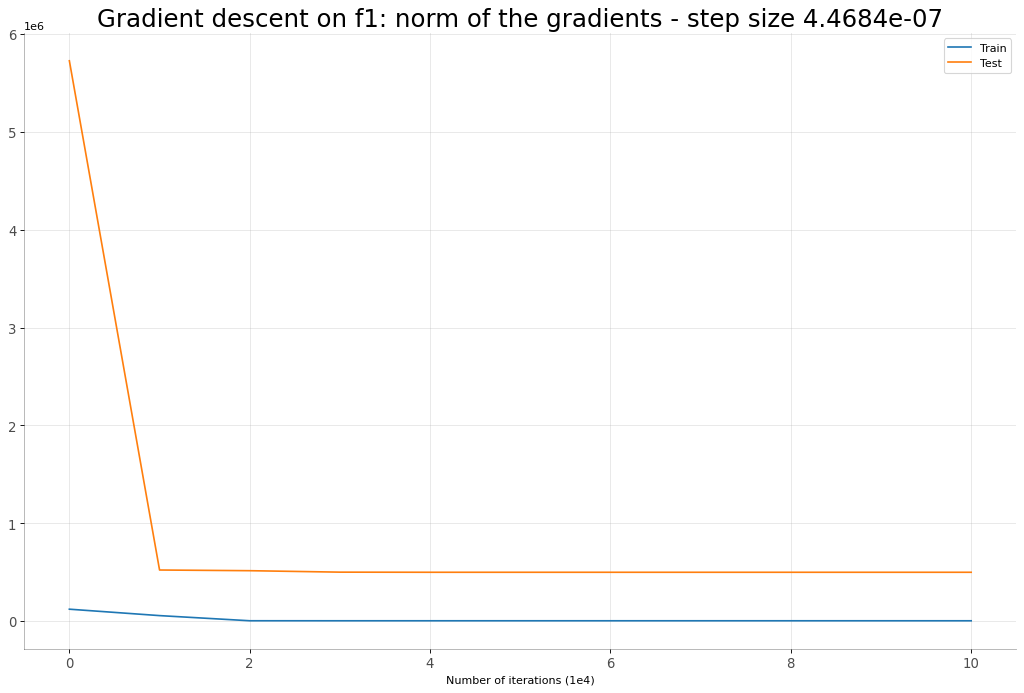

In [29]:
plt.figure(figsize=(16, 10), dpi=80)

plt.plot(range(len(gradient_history_train)), gradient_history_train, label="Train")
plt.plot(range(len(gradient_history_test)), gradient_history_test, label="Test")

plt.xticks(rotation=0, fontsize=12, horizontalalignment="center", alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.title(f"Gradient descent on f1: norm of the gradients - step size {step_size:.5g}", fontsize=22)
plt.xlabel("Number of iterations (1e4)")
plt.grid(axis="both", alpha=0.3)
plt.legend()

plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

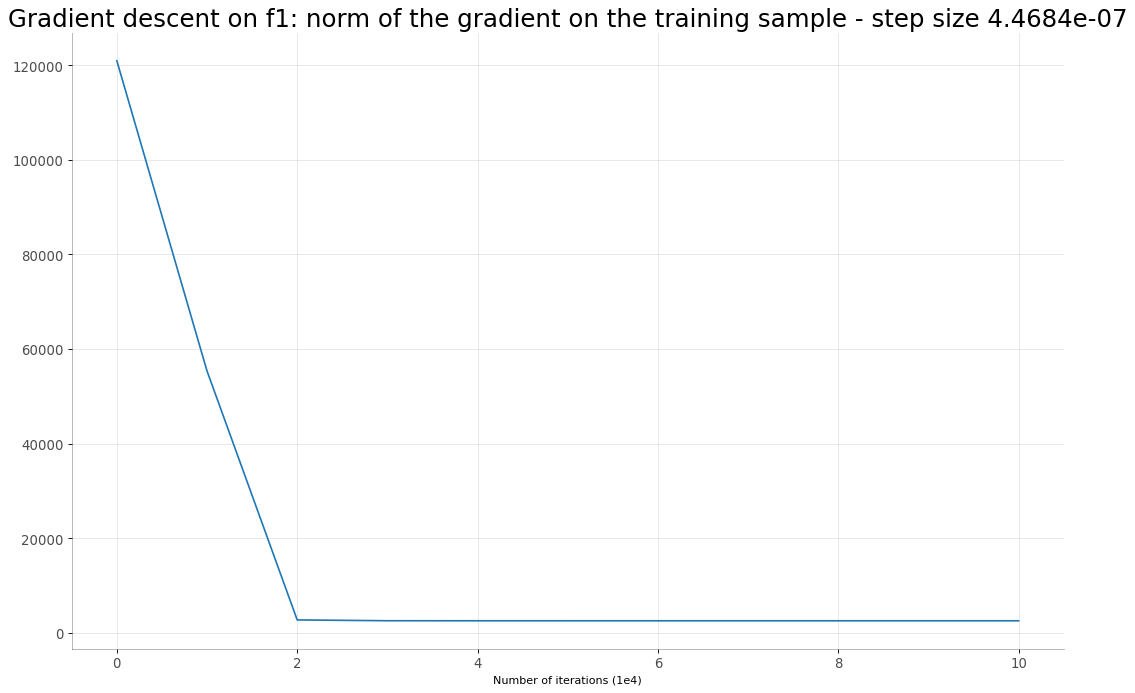

In [30]:
plt.figure(figsize=(16, 10), dpi=80)

plt.plot(range(len(gradient_history_train)), gradient_history_train, label="Train")

plt.xticks(rotation=0, fontsize=12, horizontalalignment="center", alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.title(f"Gradient descent on f1: norm of the gradient on the training sample - step size {step_size:.5g}", fontsize=22)
plt.xlabel("Number of iterations (1e4)")
plt.grid(axis="both", alpha=0.3)

plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

In [31]:
print(f"""
Training sample: {np.linalg.norm(f2_gradient_train(w_proximal_gradient_descent))},
Test sample: {np.linalg.norm(f2_gradient_test(w_proximal_gradient_descent))}
""")


Training sample: 2520.99362711994,
Test sample: 498277.4725469157



In [32]:
print(f"""
Training sample: {f2(w_proximal_gradient_descent, A, b)},
Test sample: {f2(w_proximal_gradient_descent, A_test, b_test)}
""")


Training sample: 68.77295241761897,
Test sample: 151.68325403149103



In [33]:
print(f"""
Train sample:
LSTSQ: {np.linalg.norm(b - A @ w_lstsq)},
L2 regularization: {np.linalg.norm(b - A @ w_l2_regularization)}
Gradient Descent: {np.linalg.norm(b - A @ w_gradient_descent)}
Proximal gradient Descent: {np.linalg.norm(b - A @ w_proximal_gradient_descent)}

Test sample
LSTSQ: {np.linalg.norm(b_test - A_test @ w_lstsq)},
L2 regularization: {np.linalg.norm(b_test - A_test @ w_l2_regularization)}
Gradient Descent: {np.linalg.norm(b_test - A_test @ w_gradient_descent)}
Proximal gradient Descent: {np.linalg.norm(b_test - A_test @ w_proximal_gradient_descent)}
""")


Train sample:
LSTSQ: 9.205722154343223e-13,
L2 regularization: 12.398650226890355
Gradient Descent: 12.427240132697595
Proximal gradient Descent: 11.727996624967025

Test sample
LSTSQ: 530.9466555560982,
L2 regularization: 329.66770079188836
Gradient Descent: 330.1904661278845
Proximal gradient Descent: 17.417419672930375



The proximal gradient descent algorithm, differently than the gradient descent algorithm, is able to minimize the functions both on the training and test samples, it converges much more quickly, despite being similar in computational complexity and time ressources employed. Nevertheless, it is important to take notice that the proximal gradient descent was not able to minimize the norm of the gradient to a magnitude less than $1$, even in $1\cdot10^5$ iterations. Furthermore, it is remarkable how the proximal gradient descent seems to be more robust to overfitting.

### Question 4.3.

In [34]:
def line_search(a, b, w, obj_func, grad_func):
    step_size = b
    wp = w - step_size * grad_func(w)
    delta_w = wp - w

    while (
        obj_func(wp)
        > obj_func(w)
        + grad_func(w) @ delta_w
        + 1 / (2 * step_size) * np.linalg.norm(wp - w) ** 2
    ):
        step_size *= a
        wp = w - step_size * grad_func(w)
        delta_w = wp - w

    return step_size


def proximal_gradient_descent_line_search(
    max_iterations,
    a,
    b,
    w_init,
    lambd,
    obj_func,
    grad_func,
    threshold=1,
    verbose=False,
):
    w = w_init
    w_history = w
    f_history = obj_func(w)

    for iteration in range(max_iterations):
        step_size = line_search(a, b, w, obj_func, grad_func)
        w = soft_thresholding(w - step_size * grad_func(w), lambd * step_size)

        if iteration % 10000 == 0 and verbose:
            w_history = np.vstack((w_history, w))
            f_history = np.vstack((f_history, obj_func(w)))
            print(f"Step: {iteration}, Norm of grad: {np.linalg.norm(grad_func(w))}")

        if np.linalg.norm(grad_func(w)) <= threshold and verbose:
            print(f"Number of iterations: {iteration}")
            print(f"Norm of grad: {np.linalg.norm(grad_func(w))}")
            break

    if verbose:
        return w, w_history, f_history

    return w

In [35]:
(
    w_proximal_gradient_descent_line_search,
    w_proximal_gradient_descent_line_search_history,
    f_history_train,
) = proximal_gradient_descent_line_search(
    max_iterations=100000,
    a=0.5,
    b=2/L,
    lambd=200,
    w_init=np.zeros(A.shape[1]),
    obj_func=lambda w: f2(w, A, b),
    grad_func=f2_gradient_train,
    verbose=True,
)

Step: 0, Norm of grad: 45469.48298434487
Step: 10000, Norm of grad: 2673.438426248707
Step: 20000, Norm of grad: 2526.7012032004936
Step: 30000, Norm of grad: 2521.2356282697565
Step: 40000, Norm of grad: 2521.004434231764
Step: 50000, Norm of grad: 2520.994110120992
Step: 60000, Norm of grad: 2520.9936487061404
Step: 70000, Norm of grad: 2520.9936280836805
Step: 80000, Norm of grad: 2520.9936271618726
Step: 90000, Norm of grad: 2520.99362712089


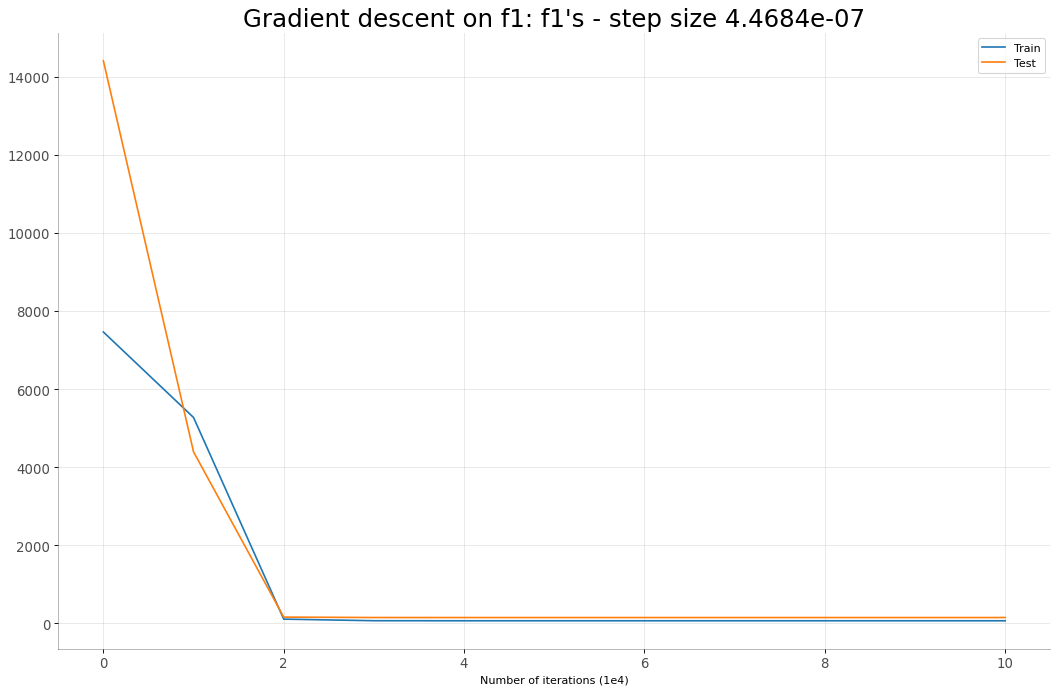

In [36]:
f_history_test = np.vstack(
    [f2(w, A_test, b_test) for w in w_proximal_gradient_descent_line_search_history]
)

plt.figure(figsize=(16, 10), dpi=80)

plt.plot(range(len(f_history_train)), f_history_train, label="Train")
plt.plot(range(len(f_history_test)), f_history_test, label="Test")

plt.xticks(rotation=0, fontsize=12, horizontalalignment="center", alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.title(f"Gradient descent on f1: f1's - step size {step_size:.5g}", fontsize=22)
plt.xlabel("Number of iterations (1e4)")
plt.grid(axis="both", alpha=0.3)
plt.legend()

plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

In [37]:
gradient_history_train = np.vstack(
    [np.linalg.norm(f2_gradient_train(w)) for w in w_proximal_gradient_descent_line_search_history]
)
gradient_history_test = np.vstack(
    [np.linalg.norm(f2_gradient_test(w)) for w in w_proximal_gradient_descent_line_search_history]
)

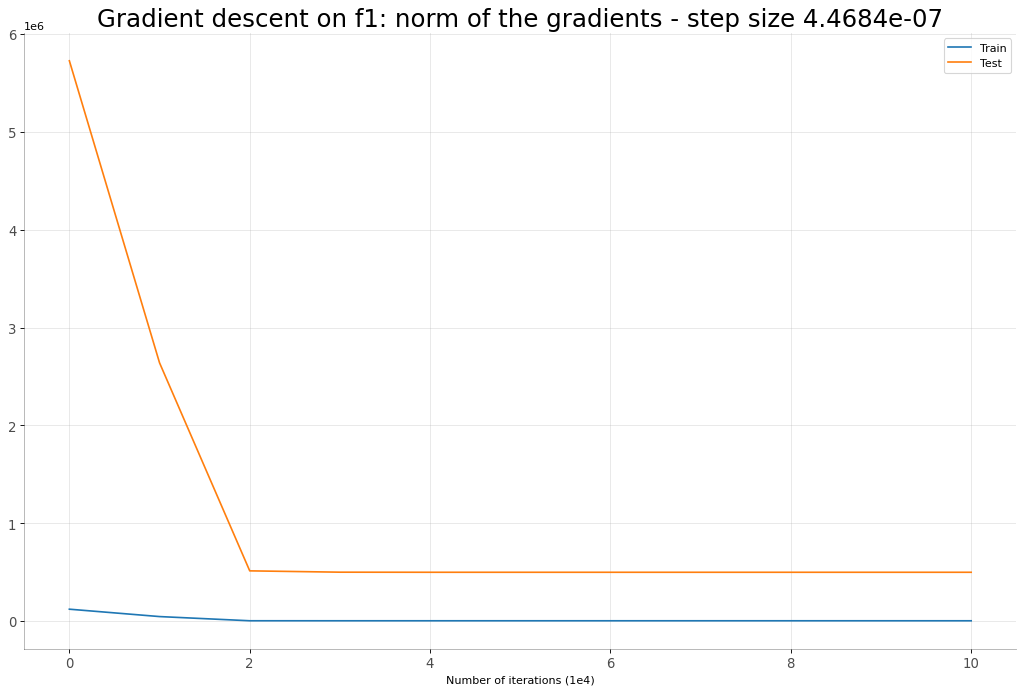

In [38]:
plt.figure(figsize=(16, 10), dpi=80)

plt.plot(range(len(gradient_history_train)), gradient_history_train, label="Train")
plt.plot(range(len(gradient_history_test)), gradient_history_test, label="Test")

plt.xticks(rotation=0, fontsize=12, horizontalalignment="center", alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.title(f"Gradient descent on f1: norm of the gradients - step size {step_size:.5g}", fontsize=22)
plt.xlabel("Number of iterations (1e4)")
plt.grid(axis="both", alpha=0.3)
plt.legend()

plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

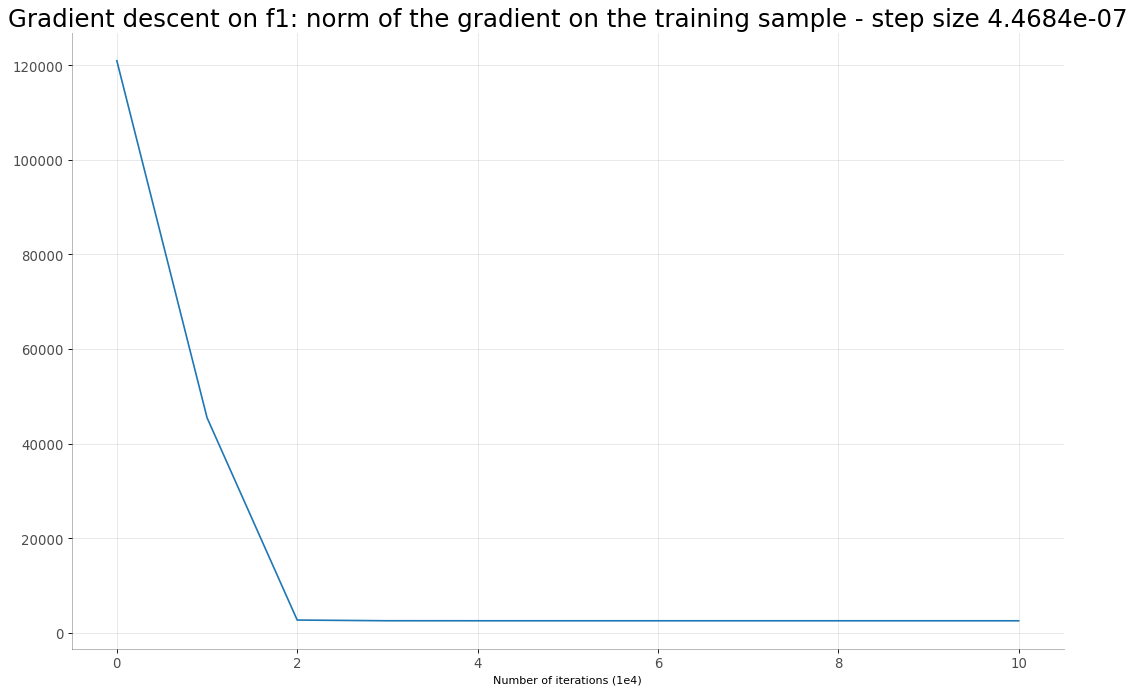

In [39]:
plt.figure(figsize=(16, 10), dpi=80)

plt.plot(range(len(gradient_history_train)), gradient_history_train, label="Train")

plt.xticks(rotation=0, fontsize=12, horizontalalignment="center", alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.title(f"Gradient descent on f1: norm of the gradient on the training sample - step size {step_size:.5g}", fontsize=22)
plt.xlabel("Number of iterations (1e4)")
plt.grid(axis="both", alpha=0.3)

plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

In [40]:
print(f"""
Training sample: {np.linalg.norm(f2_gradient_train(w_proximal_gradient_descent_line_search))},
Test sample: {np.linalg.norm(f2_gradient_test(w_proximal_gradient_descent_line_search))}
""")


Training sample: 2520.9936271193674,
Test sample: 498277.47254682577



In [41]:
print(f"""
Training sample: {f2(w_proximal_gradient_descent_line_search, A, b)},
Test sample: {f2(w_proximal_gradient_descent_line_search, A_test, b_test)}
""")


Training sample: 68.77295241745867,
Test sample: 151.68325403143805



In [42]:
print(f"""
Train sample:
LSTSQ: {np.linalg.norm(b - A @ w_lstsq)},
L2 regularization: {np.linalg.norm(b - A @ w_l2_regularization)}
Gradient descent: {np.linalg.norm(b - A @ w_gradient_descent)}
Proximal gradient descent: {np.linalg.norm(b - A @ w_proximal_gradient_descent)}
Proximal gradient descent with line search: {np.linalg.norm(b - A @ w_proximal_gradient_descent_line_search)}

Test sample
LSTSQ: {np.linalg.norm(b_test - A_test @ w_lstsq)},
L2 regularization: {np.linalg.norm(b_test - A_test @ w_l2_regularization)}
Gradient descent: {np.linalg.norm(b_test - A_test @ w_gradient_descent)}
Proximal gradient descent: {np.linalg.norm(b_test - A_test @ w_proximal_gradient_descent)}
Proximal gradient descent with line search: {np.linalg.norm(b_test - A_test @ w_proximal_gradient_descent_line_search)}
""")


Train sample:
LSTSQ: 9.205722154343223e-13,
L2 regularization: 12.398650226890355
Gradient descent: 12.427240132697595
Proximal gradient descent: 11.727996624967025
Proximal gradient descent with line search: 11.727996624953358

Test sample
LSTSQ: 530.9466555560982,
L2 regularization: 329.66770079188836
Gradient descent: 330.1904661278845
Proximal gradient descent: 17.417419672930375
Proximal gradient descent with line search: 17.417419672927334



The proximal gradient descent algorithm with line search achieves similar results as the proximal gradient descent algorithm, it is able to minimize the functions both on the training and test samples, it converges even more quickly, despite being similar in computational complexity and time ressources employed. Nevertheless, it is important to take notice that the proximal gradient descent was not able to minimize the norm of the gradient to a magnitude less than $1$, even in $1\cdot10^5$ iterations.

## 6. Comparison

### Question 6.1.

The comparison between the two types of regularization was done throughout this academic report in previous sections.